In [ ]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/JoanClaverol/titanic_data/main/train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# accuracy previous iterations

# dummy model
acc_2nd = 0.7668161434977578

# decision tree with only feature sex
acc_3rd = 0.7668161434977578

# overfitted tree
acc_4th = 0.7821229050279329

# manual tunning tree (max_depth = 3)
acc_5th = 0.7597765363128491

# 6th iteration: scikit-learn pipeline

In [ ]:
# crtate train and test
from sklearn.model_selection import train_test_split

X = titanic.drop(columns=['Name','Ticket','Cabin','PassengerId','Survived'])
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
521,3,male,22.0,0,0,7.8958,S
753,3,male,23.0,0,0,7.8958,S
643,3,male,NaN,0,0,56.4958,S
332,1,male,38.0,0,1,153.4625,S
743,3,male,24.0,1,0,16.1000,S


## Preprocess: build our first sklean pipeline

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# creating the sklearn piplines

# numeric columns
numerical_pipeline = Pipeline(
    steps=[('impute', SimpleImputer(strategy='median')),
           ('scale', MinMaxScaler())])

# categorical columns
categorical_pipeline = Pipeline(
    steps=[('impute', SimpleImputer(strategy='most_frequent')),
           ('one-hot', OneHotEncoder(drop='first', sparse=False))])

In [ ]:
X_train[cat_col].head(4)

,Pclass,Sex,Embarked
521,3,male,S
753,3,male,S
643,3,male,S
332,1,male,S


In [ ]:
num_col = ['Age','Fare','SibSp','Parch']
cat_col = ['Pclass','Sex','Embarked']

pd.DataFrame(categorical_pipeline.fit_transform(X_train[cat_col]))#.head()

,0,1,2,3,4
0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...
663,0.0,0.0,0.0,0.0,1.0
664,1.0,0.0,0.0,0.0,1.0
665,1.0,0.0,1.0,0.0,0.0
666,1.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.compose import ColumnTransformer

# apply ColumnTransformers to combine different Pipeline
full_processor = ColumnTransformer(
    transformers=[
                  ('number', numerical_pipeline, num_col), 
                  ('category', categorical_pipeline, cat_col)     
    ]
)

pd.DataFrame(full_processor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8
0,0.271174,0.015412,0.000,0.000000,0.0,1.0,1.0,0.0,1.0
1,0.283740,0.015412,0.000,0.000000,0.0,1.0,1.0,0.0,1.0
2,0.359135,0.110272,0.000,0.000000,0.0,1.0,1.0,0.0,1.0
3,0.472229,0.299539,0.000,0.166667,0.0,0.0,1.0,0.0,1.0
4,0.296306,0.031425,0.125,0.000000,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
663,0.233476,0.051302,0.000,0.333333,0.0,0.0,0.0,0.0,1.0
664,0.359135,0.050749,0.125,0.000000,1.0,0.0,0.0,0.0,1.0
665,0.359135,0.054107,0.125,0.000000,1.0,0.0,1.0,0.0,0.0
666,0.019854,0.050749,0.125,0.166667,1.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# adding a model into our pipeline
tree_pipeline = Pipeline(
    steps=[
           ('preprocess', full_processor),
           ('model', DecisionTreeClassifier())
    ]
)

tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('category',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(drop='first',
          

In [ ]:
tree_pipeline.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0])

## Test sklearn pipline

In [ ]:
from sklearn.metrics import accuracy_score

# accuracy for train data
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.9790419161676647

In [ ]:
# accuracy test data
preds = tree_pipeline.predict(X_test)
acc_6th = accuracy_score(preds, y_test)
acc_6th

0.7982062780269058

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


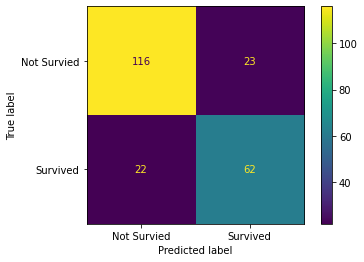

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# plot confusion matrix
plot_confusion_matrix(
    tree_pipeline, 
    X_test, y_test, 
    display_labels=['Not Survied', 'Survived']
    );

# 7th iteration: Manual model tunning

## Preprocess (nice and clean code)

In [ ]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])

# automating the column selection
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

## Tunning our model

In [ ]:
# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier(max_depth=4))
])
# fit our model to the train
tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.8353293413173652

In [ ]:
# fit our model to the train
tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

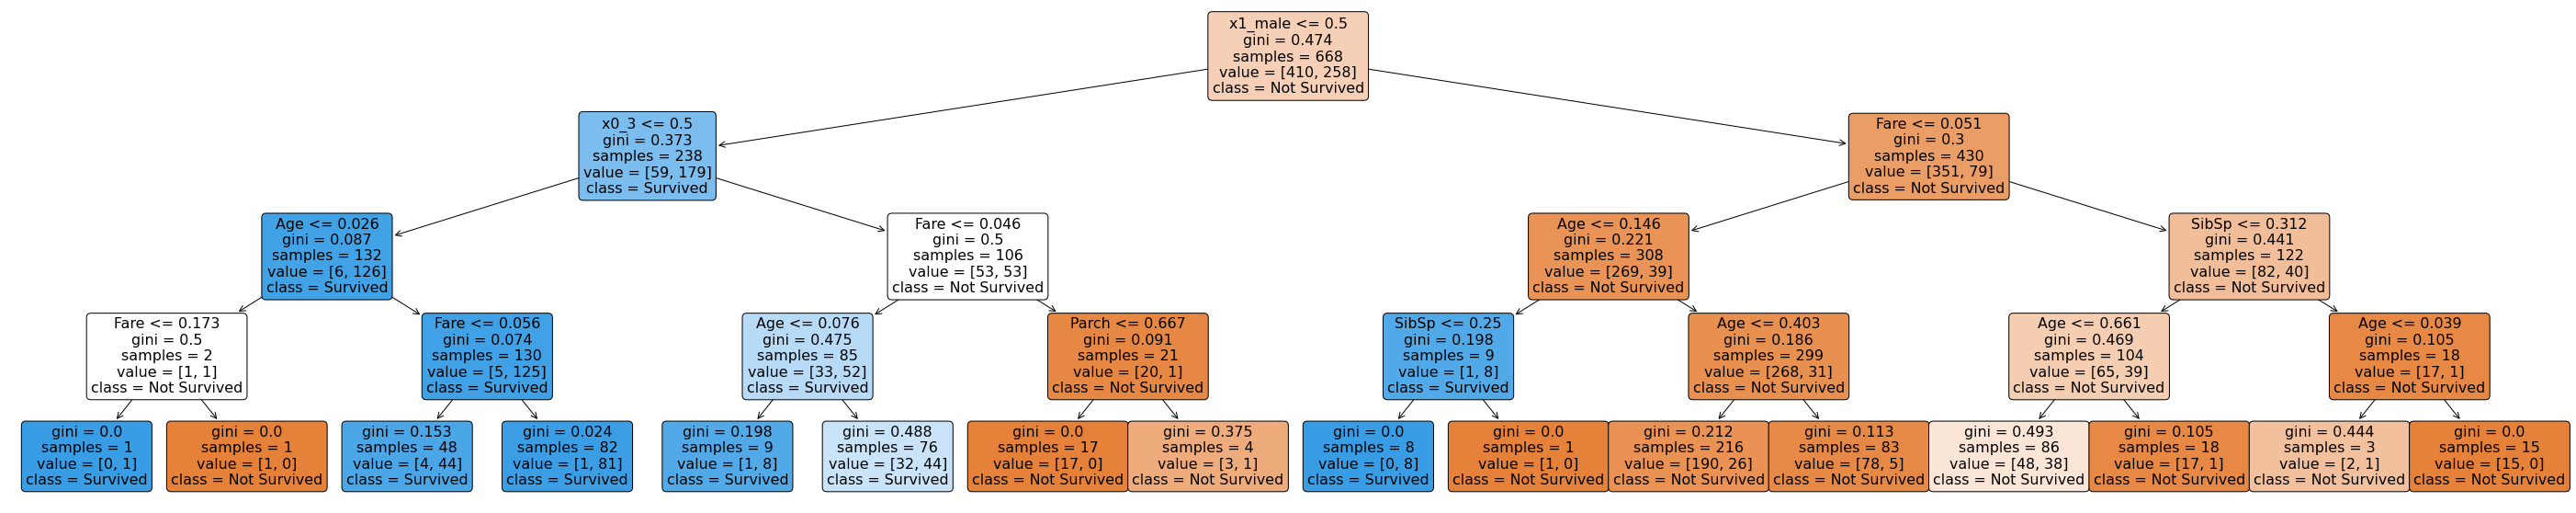

In [ ]:
# plot our model

# get column names
col_names = num_col.copy()
col_names.extend(
    tree_pipeline.named_steps['preprocess'].transformers_[1][1].named_steps['one-hot'].get_feature_names_out()
)

# plot
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 10))
plot_tree(
    tree_pipeline['model'],
    filled=True, 
    rounded=True, 
    feature_names=col_names, 
    class_names=['Not Survived', 'Survived']
    );

## Test our model

In [ ]:
preds = tree_pipeline.predict(X_test)
acc_7th = accuracy_score(preds, y_test)
acc_7th

0.7892376681614349

Text(0.5, 1.0, 'Accuracy evolution through iterations')

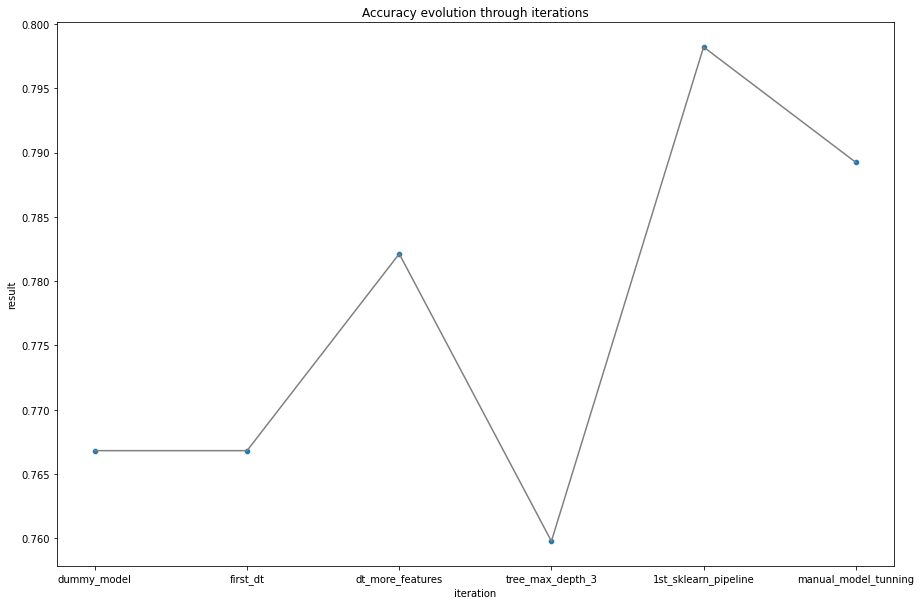

In [ ]:
import seaborn as sns
# our we improving our model?
plt.subplots(figsize=(15, 10))
# ax = plt.axes()
results = {
    'dummy_model':acc_2nd, 
    'first_dt':acc_3rd, 
    'dt_more_features':acc_4th, 
    'tree_max_depth_3':acc_5th,
    '1st_sklearn_pipeline':acc_6th,
    'manual_model_tunning':acc_7th
}

results_df = pd.DataFrame({
    'iteration':results.keys(),
    'result':results.values()
})
sns.lineplot(data=results_df, x='iteration', y='result', color='grey')
sns.scatterplot(data=results_df, x='iteration', y='result')
plt.title('Accuracy evolution through iterations')

# 8th iteration: Auto model tunning + Cross Validation

In [ ]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
# automating the column selection
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier())
])


In [ ]:
# automating the search of the different parameters for our model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__max_depth': range(3, 8),
    'model__min_samples_leaf': range(5, 10),
    'model__min_samples_split': range(6, 10),
    'model__criterion':['gini','entropy']
    }

# fit our model to the train
search = GridSearchCV(
    tree_pipeline, 
    param_grid, 
    cv=4, 
    scoring='accuracy',
    verbose=1, 
    refit=True,
    n_jobs=-1
)

_ = search.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


In [ ]:
search.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 6,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 6}

In [ ]:
accuracy_score(search.predict(X_train), y_train)

0.8592814371257484

## Test our model

In [ ]:
acc_8th = accuracy_score(search.predict(X_test), y_test)
acc_8th

0.8026905829596412

Text(0.5, 1.0, 'Accuracy evolution through iterations')

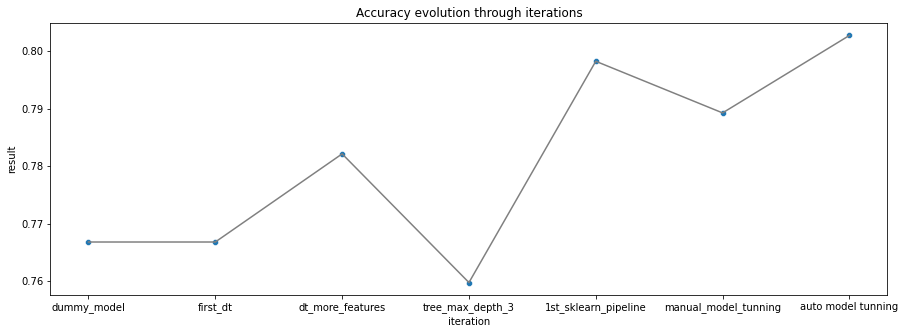

In [ ]:
plt.subplots(figsize=(15, 5))

results['auto model tunning'] = acc_8th

results_df = pd.DataFrame({
    'iteration':results.keys(),
    'result':results.values()
})
sns.lineplot(data=results_df, x='iteration', y='result', color='grey')
sns.scatterplot(data=results_df, x='iteration', y='result')
plt.title('Accuracy evolution through iterations')

# 9th iteration: get status from name

## Train and test split

In [ ]:
X = titanic.drop(columns=['Ticket','Cabin','PassengerId','Survived']) # 'Name' we are going to extract some information from it
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.sample(10)

## Pre processing: adding passenger status

### Understanding Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# example extracting common words with count vectorizer


### Clean code

In [ ]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
# extract title from the name
status_egnineering = Pipeline(steps=[
    # will keep it at 7 to reduce the computational time
    ('status', CountVectorizer(max_features=7))
])
# automating the column selection
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col),
    ('engineering', status_egnineering, 'Name')
])

# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier())
])
# automating the search of the different parameters for our model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__max_depth': range(1, 8),
    'model__min_samples_leaf': range(1, 10),
    'model__min_samples_split': range(2, 10),
    'model__criterion':['gini','entropy']
    }
search = GridSearchCV(
    tree_pipeline, 
    param_grid,
    cv=5, 
    scoring='accuracy',
    verbose=1,
    refit=True, 
    n_jobs=-1
    )
# fit our model to the train
_ = search.fit(X_train, y_train)
accuracy_score(search.predict(X_train), y_train)

In [ ]:
acc_8th = accuracy_score(search.predict(X_test), y_test)
acc_8th

In [ ]:
results

In [ ]:
def plot_iterations_evolution(new_iteration_name, new_acc):
    global results
    results[new_iteration_name] = new_acc

    results_df = pd.DataFrame({
        'iteration':results.keys(),
        'result':results.values()
    })
    plt.subplots(figsize=(20, 5))
    sns.lineplot(data=results_df, x='iteration', y='result', color='grey')
    sns.scatterplot(data=results_df, x='iteration', y='result')
    plt.title('Accuracy evolution through iterations')
    plt.show()

plot_iterations_evolution('name engineering', acc_8th)

## EXTRA: understanding feature importance in our model

In [ ]:
# get category names after encoders


# get category names after encoders

# dataframe feature importance


# 10th iteration: feature selection + error analysis

## Updateing our sklearn pipeline with `SelectFromModel` for feature selection

In [ ]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
# extract title from the name
status_egnineering = Pipeline(steps=[
    # we will let our decision tree to select which are the important features
    ('status', CountVectorizer(max_features=40))
])
# automating the column selection
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col),
    ('engineering', status_egnineering, 'Name')
])
# defining the parameters of our model based on previous cv
# (later on we can run again a gridsearch, but we want to speed up this process)
param_grid = {
    'criterion': 'entropy',
    'max_depth': 6,
    'min_samples_leaf': 5,
    'min_samples_split': 2
    }

from sklearn.feature_selection import SelectFromModel
# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    # using a normal decision tree to decide which features are important
    ('feature_selection', SelectFromModel(DecisionTreeClassifier())),
    ('model', DecisionTreeClassifier(**param_grid))
])
# automating the search of the different parameters for our model
# fit our model to the train
_ = tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

### Undestanding our model

In [ ]:
# get the feature names from our model
cat_enc_col = (
    tree_pipeline
    .named_steps['preprocess']
    .transformers_[1][1]
    .named_steps['one-hot']
    .get_feature_names_out()
    .tolist()
    )
name_new_col = (
    tree_pipeline
    .named_steps['preprocess']
    .transformers_[2][1]
    .get_feature_names_out()
    .tolist()
    )
# find out the names generated on the preprocessing
preprocess_col = num_col + cat_enc_col + name_new_col
# sklearn returns only the positions of these columns
selected_cols_pos = tree_pipeline.named_steps['feature_selection'].get_feature_names_out()
# find the name of the columns based on the position selcted with sklearn trasnformer `SelectFromModel`
feature_names = [preprocess_col[int(col_name.replace('x',''))] for col_name in selected_cols_pos]

plt.figure(figsize=(50, 10))
plot_tree(
    tree_pipeline['model'],
    filled=True, 
    rounded=True, 
    feature_names=feature_names, 
    class_names=['Not Survived', 'Survived']
    );

In [ ]:
# looking at the feature importance
pd.DataFrame({
    'cols': feature_names,
    'importance':tree_pipeline.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)

## Testing our model

In [ ]:
acc_9th = accuracy_score(tree_pipeline.predict(X_test), y_test)
acc_9th

In [ ]:
plot_iterations_evolution('feature selection', acc_9th)

## Error analyisis

In [ ]:
from sklearn.metrics import confusion_matrix

def model_check(y_true, y_preds, model):     
    print('Accuracy: ', accuracy_score(y_true, y_preds))
    tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()
    plot_confusion_matrix(model, X_test, y_test, display_labels=['Not Survied', 'Survived']);
    return tn, fp, fn, tp
tn, fp, fn, tp = model_check(y_test, tree_pipeline.predict(X_test), tree_pipeline)

In [ ]:
47 / (24 + 47)

In [ ]:
from sklearn.metrics import precision_score, recall_score, cohen_kappa_score, f1_score
print(f"""
    Accuracy: {accuracy_score(tree_pipeline.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(tree_pipeline.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(tree_pipeline.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(tree_pipeline.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(tree_pipeline.predict(X_test), y_test)}
""")

#### Understanding where the errors are commoing from

Our main problem is on the people that has survived, but in reality we are predicting them as not survived. Let's do a further exploration on the survival group: 

In [ ]:
X_train_preds = X_train.copy()

X_train_errors = (
    X_train_preds
    .assign(
        preds = tree_pipeline.predict(X_train),
        true = y_train
        )
    .query('true == 1')
)
X_train_errors.head()

In [ ]:
tree_error = DecisionTreeClassifier()
_ = tree_pipeline.fit(X_train_errors.drop(columns=['preds','true']), X_train_errors['preds'])
# get the feature names from our model
cat_enc_col = (
    tree_pipeline
    .named_steps['preprocess']
    .transformers_[1][1]
    .named_steps['one-hot']
    .get_feature_names_out()
    .tolist()
    )
name_new_col = (
    tree_pipeline
    .named_steps['preprocess']
    .transformers_[2][1]
    .get_feature_names_out()
    .tolist()
    )
# find out the names generated on the preprocessing
preprocess_col = num_col + cat_enc_col + name_new_col
# sklearn returns only the positions of these columns
selected_cols_pos = tree_pipeline.named_steps['feature_selection'].get_feature_names_out()
# find the name of the columns based on the position selcted with sklearn trasnformer `SelectFromModel`
feature_names = [preprocess_col[int(col_name.replace('x',''))] for col_name in selected_cols_pos]

plt.figure(figsize=(50, 10))
plot_tree(
    tree_pipeline['model'],
    filled=True, 
    rounded=True, 
    feature_names=feature_names, 
    class_names=['Not Survived', 'Survived']
    );


We already know that all this observations should be predicted as Sruvived, the question is to understand which are the factors that leads our decision tree to labale them as Not Survived. Here we can see the main factors: 

* When you are a male and you paid a high fare
* When you are a male and your paid a really low fare but your are old

# 11th iteration: KNN

In [ ]:
# from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
# adding the model in our pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    # using a normal decision tree to decide which features are important
    ('feature_selection', SelectFromModel(DecisionTreeClassifier())),
    ('model', KNeighborsClassifier())
])

# automating the search of the different parameters for our model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_neighbors': range(1, 10),
    'model__weights': ['uniform', 'distance'],
    'model__p': [1,2]
    }
search = GridSearchCV(
    knn_pipeline, 
    param_grid,
    cv=15, 
    scoring='accuracy',
    verbose=1,
    refit=True, 
    n_jobs=-1
    )
# fit our model to the train
_ = search.fit(X_train, y_train)
accuracy_score(search.predict(X_train), y_train)

In [ ]:
acc_10th = accuracy_score(search.predict(X_test), y_test)
acc_10th

In [ ]:
plot_iterations_evolution('Knn', acc_10th)

# 12th iteration: Random Forest

In [ ]:
# from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# adding the model in our pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    # using a normal decision tree to decide which features are important
    ('feature_selection', SelectFromModel(DecisionTreeClassifier())),
    ('model', RandomForestClassifier())
])

# automating the search of the different parameters for our model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__max_depth': range(1, 8),
    'model__min_samples_leaf': range(1, 5),
    'model__min_samples_split': range(2, 5),
    'model__criterion':['gini','entropy']
    }
search = GridSearchCV(
    knn_pipeline, 
    param_grid,
    cv=5, 
    scoring='accuracy',
    verbose=1,
    refit=True, 
    n_jobs=-1
    )
# fit our model to the train
_ = search.fit(X_train, y_train)
accuracy_score(search.predict(X_train), y_train)

In [ ]:
acc_11th = accuracy_score(search.predict(X_test), y_test)
acc_11th

In [ ]:
plot_iterations_evolution('RF', acc_11th)